# Taller 2 - Panda
---
* Wilgen Vicente Correa Padilla
* Fecha 3 abril 2021
---

Temas:

1. Diga qué índices serían pertienentes tener y pongalos.

2. Elimine registros que tengan NA en la columna "pm2.5"

3. Realice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados.

4. Realice un gráfico de disperción de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. Describa: ¿Qué se puede inferir de dicho gráfico?

5. Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120

6. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.


# Importar las librerias de trabajo

In [87]:
# Importar las librerias de trabajo
import matplotlib.pyplot as plt
from IPython.display import display 
import seaborn as sbn
from copy import deepcopy
import pandas as pd
import numpy as np


## Importar los datos de la fuente, enlace WEB, dados para el taller de Panda!

In [88]:
## importar los datos de la fuente, enlace WEB
# Se lee la fuente de información y se vincula al Data Frame df
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv", header=0)
pd.options.display.max_columns=None



# Resumen:
## Información del DataSet, corresponden a los datos meteorológicos entre 1 ENE de 2010 y el 31 de DIC del 2014, de la embajada de estado Unidos en Pekin

Los atributos son:

* No: Número de registro
* year: años del dato
* month: mes del dato
* day: día del dato
* hour: hora
* pm2.5: Concentración PM2.5 (ug/m^3)
* DEWP:  Punto de rocio (gota) (â„ƒ)
* TEMP: Temperatura (â„ƒ)
* PRES: Presión (hPa)
* cbwd: Dirección del viento combinada
* Iws: Velocidad del viento acumulada (m/s)
* Is: Horas acumulada de nieve
* Ir: Horas acumuladas de lluvia



# Consultar las dimensiones de Data Frame - y algunas columnas básicas!

In [89]:
# Consultar las dimensiones de Data Frame
dimension_df = deepcopy(df.shape)
print("Visualiza las dimensiones del Data Frame: ", df.shape)
# Visualiza la información de las columnas de la fuente de datos, sus columnas (No, year, month,day,hour,pm2.5..., TEMP entre otras)
display(df.info())

Visualiza las dimensiones del Data Frame:  (43824, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


None

## Se visualiza algunas filas de la información de la fuente de datos!

In [90]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


# se visualizan algunos caracteristicas estadísticas de importancia.

In [91]:
# se visualizan algunos caracteristicas -estadísticas de importancia. 
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


# PUNTO 1. Diga qué índices serían pertinentes tener y pongalos.
  Generar un campo fecha a partir de las columnas year,month,day es un campo para referenciar mejor la cronología de los datos fuentes.
 * ===> Concatenar year-month-day Hora, para generar un campo tipo fecha.
 * ===> Visualiza el nuevo campo de "fecha" en el Data Frame

 * RTA: - Mediante una serie de tiempos, se concatenan los campos correspondientes a fecha y hora  para lograr la unicidad de cada registro, el resultado de esta concatenación es identificado como el indice de trabajo de Set de datos para las tarea consecuentes.
 

In [92]:
def format_fecha(hora):
  if hora < 10:
      hora_str = "0{}".format(hora)
  else:
      hora_str = "{}".format(hora)
  return hora_str

# Generar un campo fecha a partir de las columnas year,month,day es un campo para referenciar mejor la cronologia de los datos
df["fecha"] =  pd.to_datetime(
      df['year'].map(str) + "-" + 
      df['month'].map(str) + "-" + 
      df['day'].map(str) + " " + 
      df['hour'].map(format_fecha), 
      format="%Y-%m-%d %H"
    )
# Asignar un indice al campo fecha construido
df = df.set_index("fecha")

In [93]:
# Visualiza el nuevo campo de fecha en el Data Frame
df.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
fecha,,,,,,,,,,,,,
2014-12-31 19:00:00,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
2014-12-31 22:00:00,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
2014-12-31 23:00:00,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


# PUNTO 2. Elimine registros que tengan NA en la columna "pm2.5"

In [94]:
# se identifica la columna pm2.5 y se remueve de data frame
df.dropna(subset=['pm2.5'],inplace=True)
dimension_df1 = df.shape
print("Se eliminaron {} los datos pm2.5 identificados como NaN".format(dimension_df[0] - dimension_df1[0]))
print("la nueva cantidad de registros es: ", dimension_df1)


Se eliminaron 2067 los datos pm2.5 identificados como NaN
la nueva cantidad de registros es:  (41757, 13)


* RTA: Despues de ejecutar el procedimiento de limpieza de los datos identificados como NaN en la columna pm2.5, se eliminaron 2.067 registros quedando un nuevo conjunto de datos de: 41.757 registros. 

# PUNTO 3. Realice una descripción de todas las variables por año. Además de realizar un gráfico como "boxplot" con el que pueda comparar los resultados dados.
 ** Distribución de pm2.5 por años

 RTA: Los rangos intercuartilicos de la gráfica de PM2.5, en  los años tiene un comportamiento parecido, sin una variación determinante de su mediana. en la muestra de PM2.5. En el año 2012  se nota valores atipicos que afectan la mediana ponderada.

 - Para la gráfica de temperatura, los valores de su mediana por años son diferenciales y en el 2012 su valor supera los 11 grados.



In [95]:
for year in range(df['year'].min(), df['year'].max()):
  print("Descripción de la variable pm2.5 para el año", year)
  print("-"*25)
  display(df[df["year"]== year] ["pm2.5"].describe(include='all'))

Descripción de la variable pm2.5 para el año 2010
-------------------------


count    8091.000000
mean      104.045730
std        92.281185
min         1.000000
25%        35.000000
50%        79.000000
75%       147.000000
max       980.000000
Name: pm2.5, dtype: float64

Descripción de la variable pm2.5 para el año 2011
-------------------------


count    8032.000000
mean       99.071340
std        92.967298
min         2.000000
25%        27.000000
50%        71.000000
75%       139.000000
max       595.000000
Name: pm2.5, dtype: float64

Descripción de la variable pm2.5 para el año 2012
-------------------------


count    8295.000000
mean       90.545871
std        81.745087
min         0.000000
25%        25.000000
50%        69.000000
75%       132.000000
max       994.000000
Name: pm2.5, dtype: float64

Descripción de la variable pm2.5 para el año 2013
-------------------------


count    8678.000000
mean      101.712376
std        98.070477
min         2.000000
25%        32.000000
50%        71.500000
75%       138.000000
max       886.000000
Name: pm2.5, dtype: float64

#### Crear una gráfica boxplot para pm2.5 por años

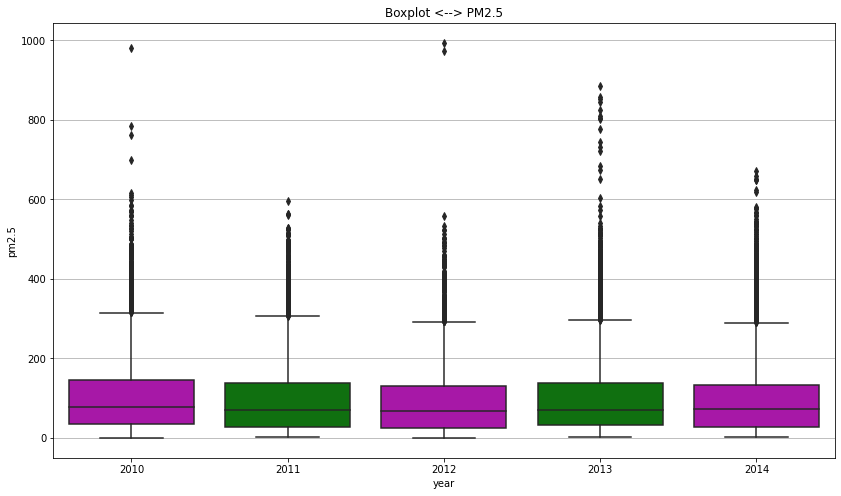

In [96]:
# Crear una gráfica boxplot para pm2.5
plt.figure(figsize=(14,8))
ax = sbn.boxplot(x="year", y="pm2.5",  data=df,palette=["m", "g"])
ax.set_title('Boxplot <--> PM2.5')
ax.yaxis.grid(True)
# Mostrar la figura
plt.show()

 ** Distribución de la variable TEMP por años


In [97]:
for year in range(df['year'].min(), df['year'].max()):
  print("Descripción de la varibale TEMP para el año", year)
  print("-"*25)
  display(df[df["year"]== year] ["TEMP"].describe(include='all'))

Descripción de la varibale TEMP para el año 2010
-------------------------


count    8091.000000
mean       11.313805
std        12.684701
min       -19.000000
25%         0.000000
50%        11.000000
75%        23.000000
max        41.000000
Name: TEMP, dtype: float64

Descripción de la varibale TEMP para el año 2011
-------------------------


count    8032.000000
mean       12.407869
std        12.095837
min       -15.000000
25%         2.000000
50%        14.000000
75%        23.000000
max        36.000000
Name: TEMP, dtype: float64

Descripción de la varibale TEMP para el año 2012
-------------------------


count    8295.000000
mean       12.109946
std        12.339970
min       -17.000000
25%         1.000000
50%        14.000000
75%        23.000000
max        38.000000
Name: TEMP, dtype: float64

Descripción de la varibale TEMP para el año 2013
-------------------------


count    8678.000000
mean       12.383614
std        12.033222
min       -17.000000
25%         2.000000
50%        13.000000
75%        23.000000
max        38.000000
Name: TEMP, dtype: float64

### Grafica de temperatura variables TEMP

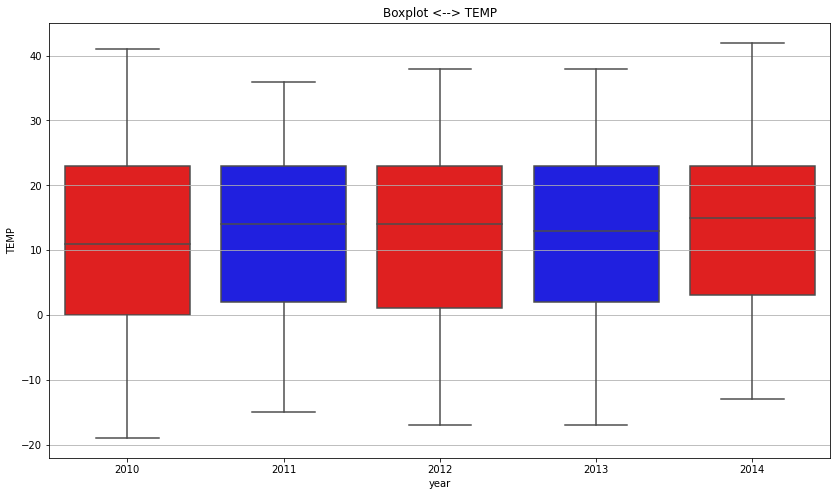

In [98]:
# Crear una gráfica boxplot para pm2.5
plt.figure(figsize=(14,8))
ax = sbn.boxplot(x="year", y="TEMP",  data=df,palette=["r", "b"])
ax.set_title('Boxplot <--> TEMP')
ax.yaxis.grid(True)
# Mostrar la figura
plt.show()

# PUNTO 4 - Realice un gráfico de dispersión de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. 


* RTA: 
 - 1. Para la gráfica de dispersión entre PM2.5 y Temperatura.... podemos inferir que con los datos trabajo, no existe una relación entre las variable !
  - 2. Sin embargo a  graficar al graficar pm2.5 con las variables 
    * Iws: Velocidad del viento acumulada (m/s)
    * Ir: Horas acumuladas de lluvia
* Si se puede inferir que tienen un comportamiento a una función mas concreta que se puede orientar su parecido a una exponencial negativa o a una grafica de pareto.  



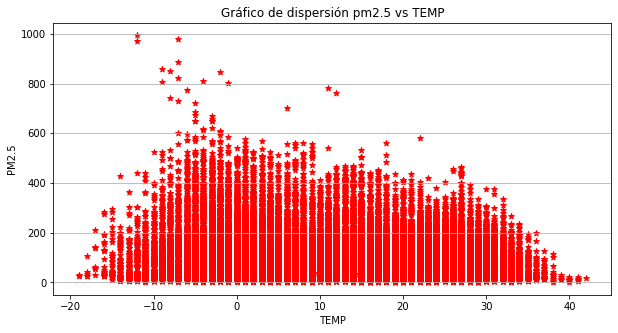

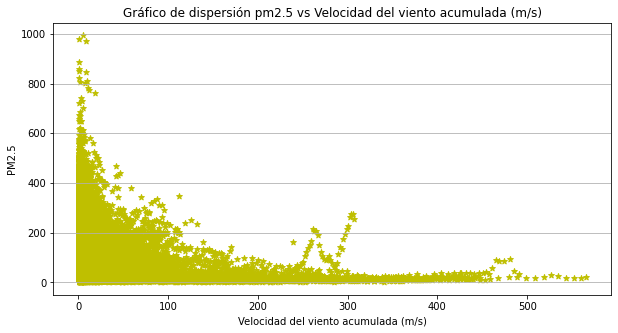

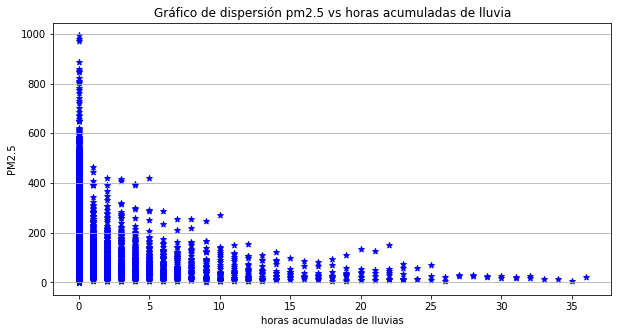

In [99]:
# Realizar el Gráfico de Dispersión
tamanios=[30,60]

#Seleccion del conjunto de datos para representarlo en el plano cartesiano.
y = df["pm2.5"].values # datos pm2.5 de DataFrame

x = df["TEMP"].values # Permeabilidad (mts/dias).
x1 = df["Iws"].values # Velocidad del viento acumulado
x2 = df["Ir"].values # horas acumuladas de lluvias 


#Dibujar el conjunto de datos en el plano
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.scatter(x, y, c='r', marker='*')
ax.set_title('Gráfico de dispersión pm2.5 vs TEMP')
ax.set_ylabel("PM2.5")
ax.set_xlabel("TEMP")
ax.yaxis.grid(True)

#Dibujar el conjunto de datos en el plano
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.scatter(x1, y, c='y', marker='*')
ax.set_title('Gráfico de dispersión pm2.5 vs Velocidad del viento acumulada (m/s)')
ax.set_ylabel("PM2.5")
ax.set_xlabel("Velocidad del viento acumulada (m/s)")
ax.yaxis.grid(True)

#Dibujar el conjunto de datos en el plano
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.scatter(x2, y, c='b', marker='*')
ax.set_title('Gráfico de dispersión pm2.5 vs horas acumuladas de lluvia')
ax.set_ylabel("PM2.5")
ax.set_xlabel("horas acumuladas de lluvias")
ax.yaxis.grid(True)



plt.show()

# PUNTO 5: Calcule la probabilidad de encontrar en la base de datos el valor de pm2.5 encima de 120

* Miremos primero la distribución de frecuencia de la variable pm2.5 y miramos su comportamiento.


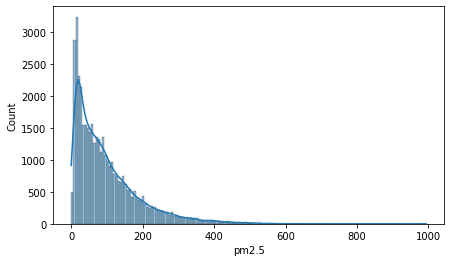

In [100]:
## Histograma de frecuencia de PM2.5

plt.figure(figsize=(7,4))
sbn.histplot(data=df, x="pm2.5", kde=True)
plt.show()


* si miramos la desviación estandar de la muestra de pm2.5 observamos....

In [101]:


#Seleccion del conjunto de datos para representarlo en el plano cartesiano.
y = df["pm2.5"].values # datos pm2.5 de DataFrame
#print(y)
mu = np.mean(y)
sigma  = np.std(y) # Distribución estandar

print("La media de pm2.5 es: ",mu)
print("La desviación Estandar de pm2.5 es: ",sigma)

La media de pm2.5 es:  98.61321455085375
La desviación Estandar de pm2.5 es:  92.04928496759753


* Con base en la Desv estandar podemos inferir que el rango de valores de la distribución de los datos de la muestra se encuentran en el rango entre [0 y 200] aprox. de los valores de la variale pm2.5

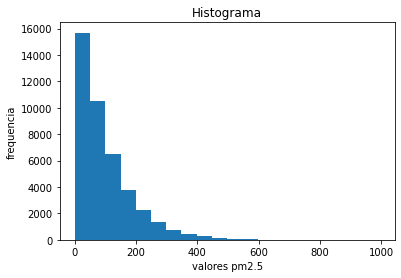

In [102]:
# Graficando histograma

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(y, 20)
plt.ylabel('frequencia')
plt.xlabel('valores pm2.5')
plt.title('Histograma')
plt.show()

In [103]:
# Una función para calcular la frecuencia de los datos

def CountFrecuency(my_list):
  freq = {}
  for item in my_list:
    if (item in freq):
        freq[item] += 1
    else:
      freq[item] = 1
  return freq


  # Imprimir las frecuencia
frec = CountFrecuency(y) # buscar las frecuencias de los datos de la variable pm2.5
for key, value in frec.items():
  print("key: %d, valor: %d"%(key, value))

# Sacar la probabilidad de f_mayor_120
 
f_mayor_120 = [x for x in y if x>120]
print("longitud de y",len(y))
print("longitud ----------------- de y mayores 120 %d",len(f_mayor_120))
prob_f_mayor_120 = len(f_mayor_120) / len(y) 
print("Prob [f mayor que 120]=  ",prob_f_mayor_120)


key: 129, valor: 109
key: 148, valor: 94
key: 159, valor: 97
key: 181, valor: 65
key: 138, valor: 116
key: 109, valor: 150
key: 105, valor: 170
key: 124, valor: 129
key: 120, valor: 116
key: 132, valor: 143
key: 140, valor: 114
key: 152, valor: 113
key: 164, valor: 115
key: 158, valor: 84
key: 154, valor: 106
key: 170, valor: 83
key: 149, valor: 107
key: 156, valor: 83
key: 126, valor: 121
key: 90, valor: 227
key: 63, valor: 243
key: 65, valor: 202
key: 55, valor: 246
key: 83, valor: 194
key: 91, valor: 198
key: 86, valor: 180
key: 82, valor: 181
key: 78, valor: 201
key: 98, valor: 175
key: 107, valor: 142
key: 96, valor: 212
key: 95, valor: 189
key: 70, valor: 233
key: 61, valor: 213
key: 53, valor: 227
key: 71, valor: 223
key: 72, valor: 209
key: 76, valor: 193
key: 73, valor: 211
key: 79, valor: 251
key: 58, valor: 205
key: 25, valor: 323
key: 26, valor: 319
key: 28, valor: 280
key: 20, valor: 411
key: 29, valor: 286
key: 27, valor: 412
key: 32, valor: 263
key: 30, valor: 244
key: 3

### Se determino que la probabilidad de obtener un valor de pm2.5 superior a 120 es de 29.89%





##  *** Se realiza la representación del gráfico y se busca el modelo que mejor se acomode a la distribución. Modelo weibull***


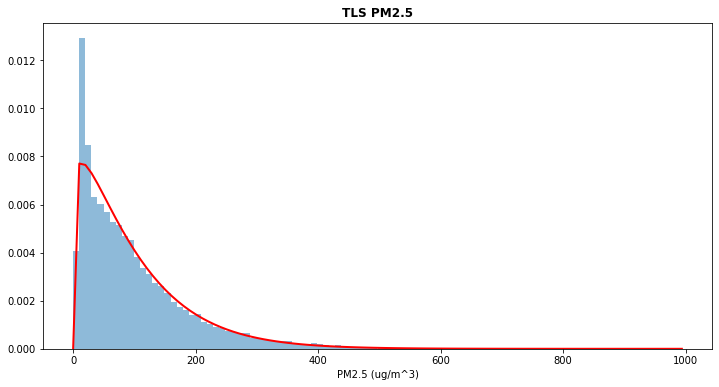

La probabilidad de encontrar un valor encima de 120 es:   30.494835138570785


In [104]:
# Realizar la represnetación y buscar el mejor modelo de acuerdo a la distribución de los datos
import scipy
import numpy

plt.figure(figsize=(12,6))
pm25 = df["pm2.5"]
p0, p1, p2 = scipy.stats.weibull_min.fit(pm25, floc=0)
plt.hist(pm25, bins=100, density=True, alpha=0.5)
support = numpy.linspace(pm25.min(), pm25.max(), 100)
plt.plot(support, scipy.stats.weibull_min.pdf(support, p0, p1, p2), "r-", lw=2)
plt.title("TLS PM2.5", weight="bold")
plt.xlabel("PM2.5 (ug/m^3)")
plt.show()
print("La probabilidad de encontrar un valor encima de 120 es:  ", (1-scipy.stats.weibull_min.cdf(120, p0, p1, p2))*100)

## Con el modelo de pareto podemos ver una aproximación parecida que suple la distribución de los datos que se presentan en la muestra de pm2.5 así:

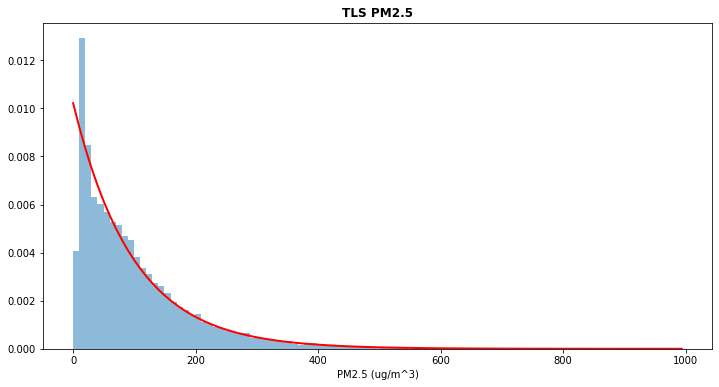

La probabilidad de encontrar un valor de 120 es:  29.365140209397488


In [105]:
plt.figure(figsize=(12,6))
pm25 = df["pm2.5"]
p3, p4, p5 = scipy.stats.pareto.fit(pm25, 1, loc=20, scale=1.05)
plt.hist(pm25, bins=100, density=True, alpha=0.5)
support = numpy.linspace(pm25.min(), pm25.max(), 100)
plt.plot(support, scipy.stats.pareto.pdf(support, p3, p4, p5), "r-", lw=2)
plt.title("TLS PM2.5", weight="bold")
plt.xlabel("PM2.5 (ug/m^3)")
plt.show()
print("La probabilidad de encontrar un valor de 120 es: ", (1-scipy.stats.pareto.cdf(120, p3, p4, p5))*100)

# PUNTO 6. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.


In [106]:
## Calculo de PM2.5 por medias y organizar por valores

print("*"*60)
print("Calcular los medias PM2.5")
print("*"*60)
pm25_medias = df.groupby(['year'])['pm2.5'].mean().sort_values()
display(pm25_medias)

print("*"*60)
print("Calcular los mínimos PM2.5")
print("*"*60)
pm25_minimos = df.groupby(['year'])['pm2.5'].min().sort_values()
display(pm25_minimos)

print("*"*60)
print("Calcular los máximos PM2.5")
print("*"*60)
pm25_maximos = df.groupby(['year'])['pm2.5'].max().sort_values()
display(pm25_maximos)


************************************************************
Calcular los medias PM2.5
************************************************************


year
2012     90.545871
2014     97.734557
2011     99.071340
2013    101.712376
2010    104.045730
Name: pm2.5, dtype: float64

************************************************************
Calcular los mínimos PM2.5
************************************************************


year
2012    0.0
2010    1.0
2011    2.0
2013    2.0
2014    2.0
Name: pm2.5, dtype: float64

************************************************************
Calcular los máximos PM2.5
************************************************************


year
2011    595.0
2014    671.0
2013    886.0
2010    980.0
2012    994.0
Name: pm2.5, dtype: float64

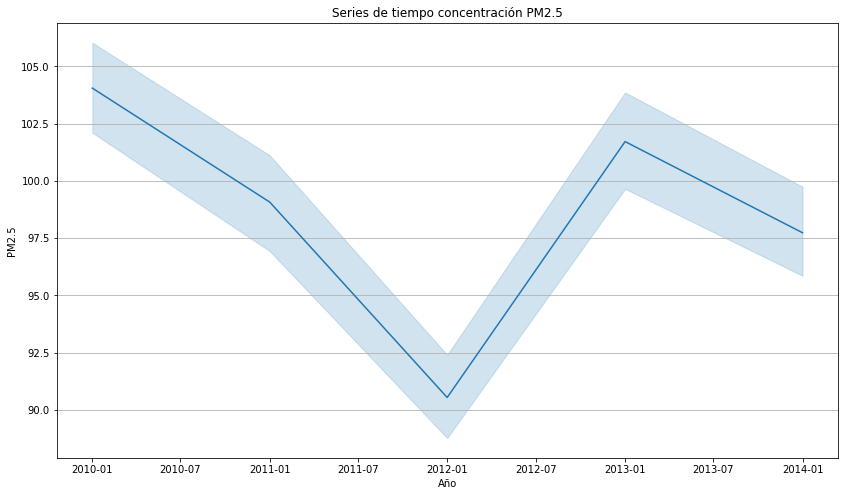

In [107]:
# Crear la figura de series de tiempo para PM2.5

plt.figure(figsize=(14,8))
ax = sbn.lineplot(x=pd.to_datetime(df['year'].map(str), format="%Y"), 
                  y="pm2.5", data=df )
ax.set(title='Series de tiempo concentración PM2.5', xlabel='Año', ylabel='PM2.5')
ax.yaxis.grid(True)

# Mostrar la figura
plt.show()

Referencias:

https://blog.findemor.es/2017/12/machine-learning-introduccion-estadistica-basica-python/

https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto

